In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


**1** Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)? **ODP: TAK, widać zależność (np. dobre wyniki dla ManagerId=4,11,16,18,19,20**

In [23]:
pd.crosstab(df['ManagerID'],df['PerformanceScore'])

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerID,,,,
1.0,0,6,0,0
2.0,4,13,2,0
3.0,0,1,0,0
4.0,2,15,0,0
5.0,2,4,1,0
6.0,1,3,0,0
7.0,0,13,0,1
9.0,0,2,0,0
10.0,2,6,1,0


**2** Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników? **ODP: z sns.boxplot: Other (najwyższa mediana)**

In [5]:
import datetime as dt
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [8]:
df['RecruitmentSource'].value_counts()

Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
MBTA ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Word of Mouth                             13
Website Banner Ads                        13
On-campus Recruiting                      12
Social Networks - Facebook Twitter etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Pay Per Click                              1
On-line Web application                    1
Careerbuilder                              1
Company In

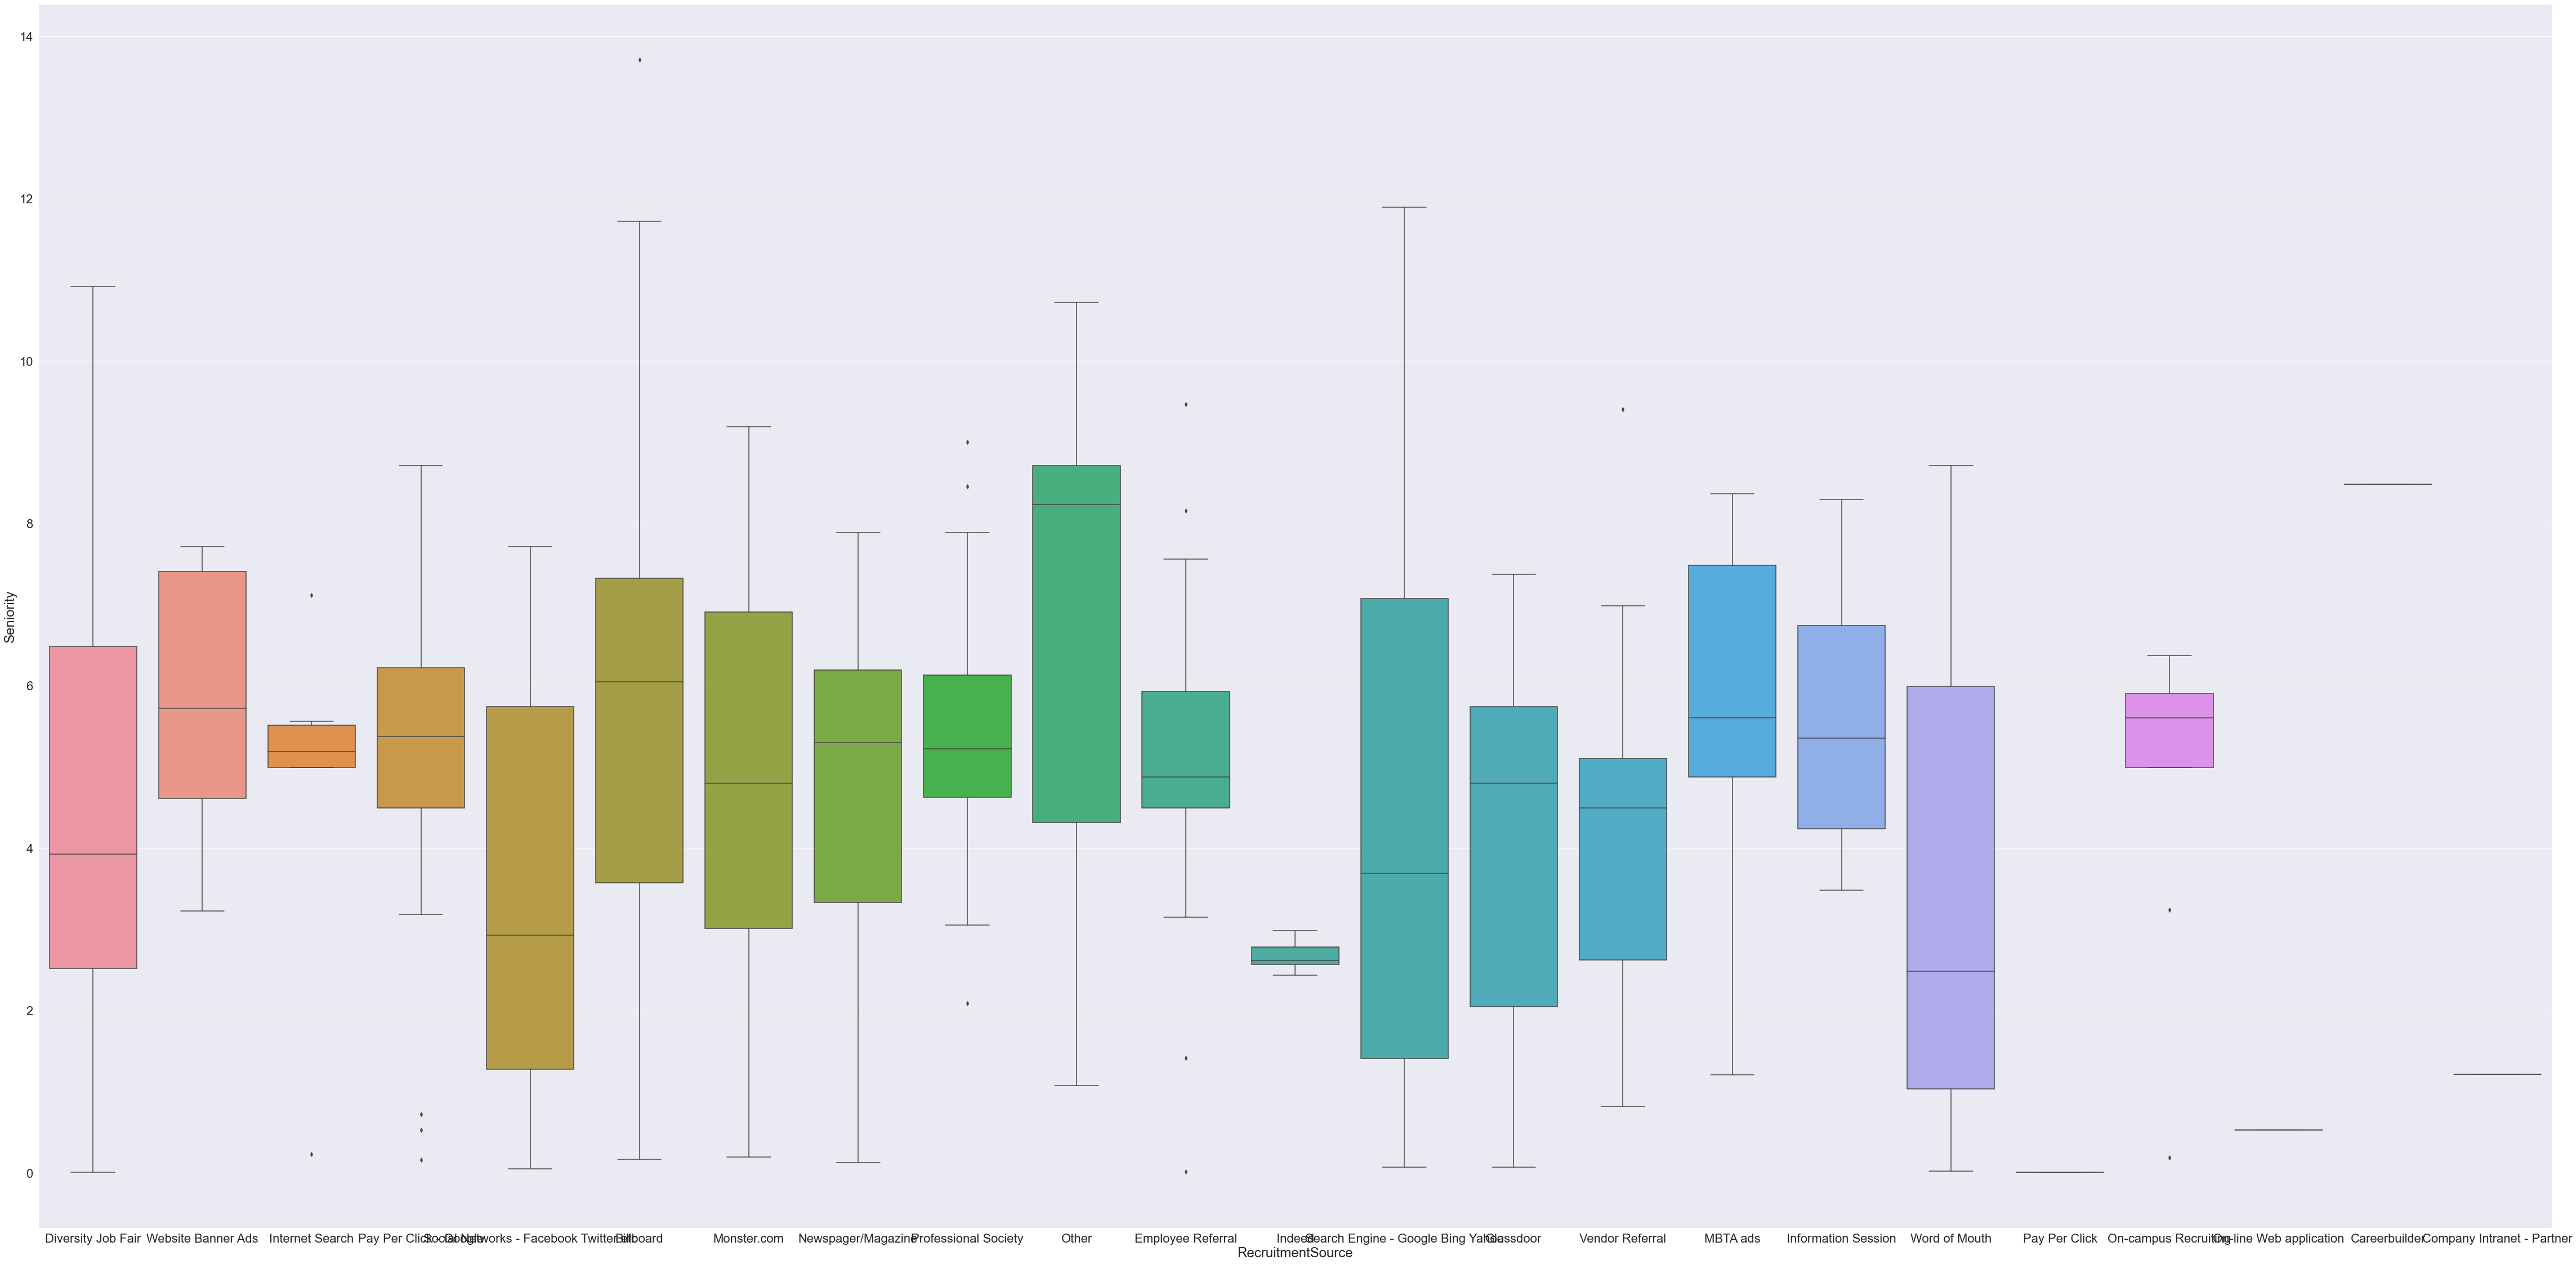

In [22]:
sns.set(font_scale=2)
g = sns.boxplot(x='RecruitmentSource',y='Seniority',data=df)
plt.show()

**3** Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)? **ODP: Brak korelacji, co ilustruje poniższy diagram**

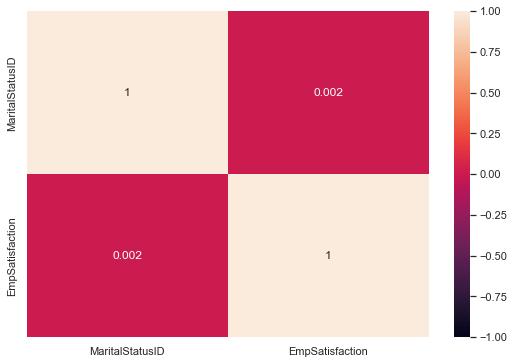

In [41]:
plt.figure(figsize=(9, 6))
sns.heatmap(df[['MaritalStatusID', 'EmpSatisfaction']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

**4** Jak wygląda struktura wieku aktualnie zatrudnionych pracowników? **ODP: UWAGA: błędy w danych, DOB z przyszłości, dla poprawnych danych od ok. 30 do ok. 50 lat, najwięcej w okolicy 40 lat**

In [29]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

def count_age(row):

    return (dt.datetime(2022,11,11) - row['DOB'])/np.timedelta64(1,'Y')

df['Age'] = df.apply(lambda row: count_age(row),axis=1)
df[df['Age'] < 0]['DOB']

6     2064-06-01
7     2063-05-15
12    2054-10-12
22    2063-08-28
31    2068-01-15
32    2065-05-07
54    2066-03-17
57    2064-01-04
61    2068-07-06
73    2054-09-21
74    2068-10-10
87    2055-11-14
91    2067-04-19
101   2065-05-09
102   2065-09-09
112   2067-06-03
115   2068-07-20
116   2067-06-05
146   2068-08-15
155   2064-04-13
157   2068-05-30
159   2061-06-19
160   2068-06-06
164   2058-12-27
175   2065-02-02
184   2066-03-22
195   2051-01-02
200   2059-08-19
213   2055-04-14
215   2052-08-18
231   2064-10-12
235   2058-11-07
242   2067-01-16
247   2063-10-30
248   2053-05-24
249   2066-04-17
250   2051-02-25
279   2052-02-11
298   2066-11-22
303   2064-07-30
305   2052-01-18
308   2065-09-09
Name: DOB, dtype: datetime64[ns]

d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

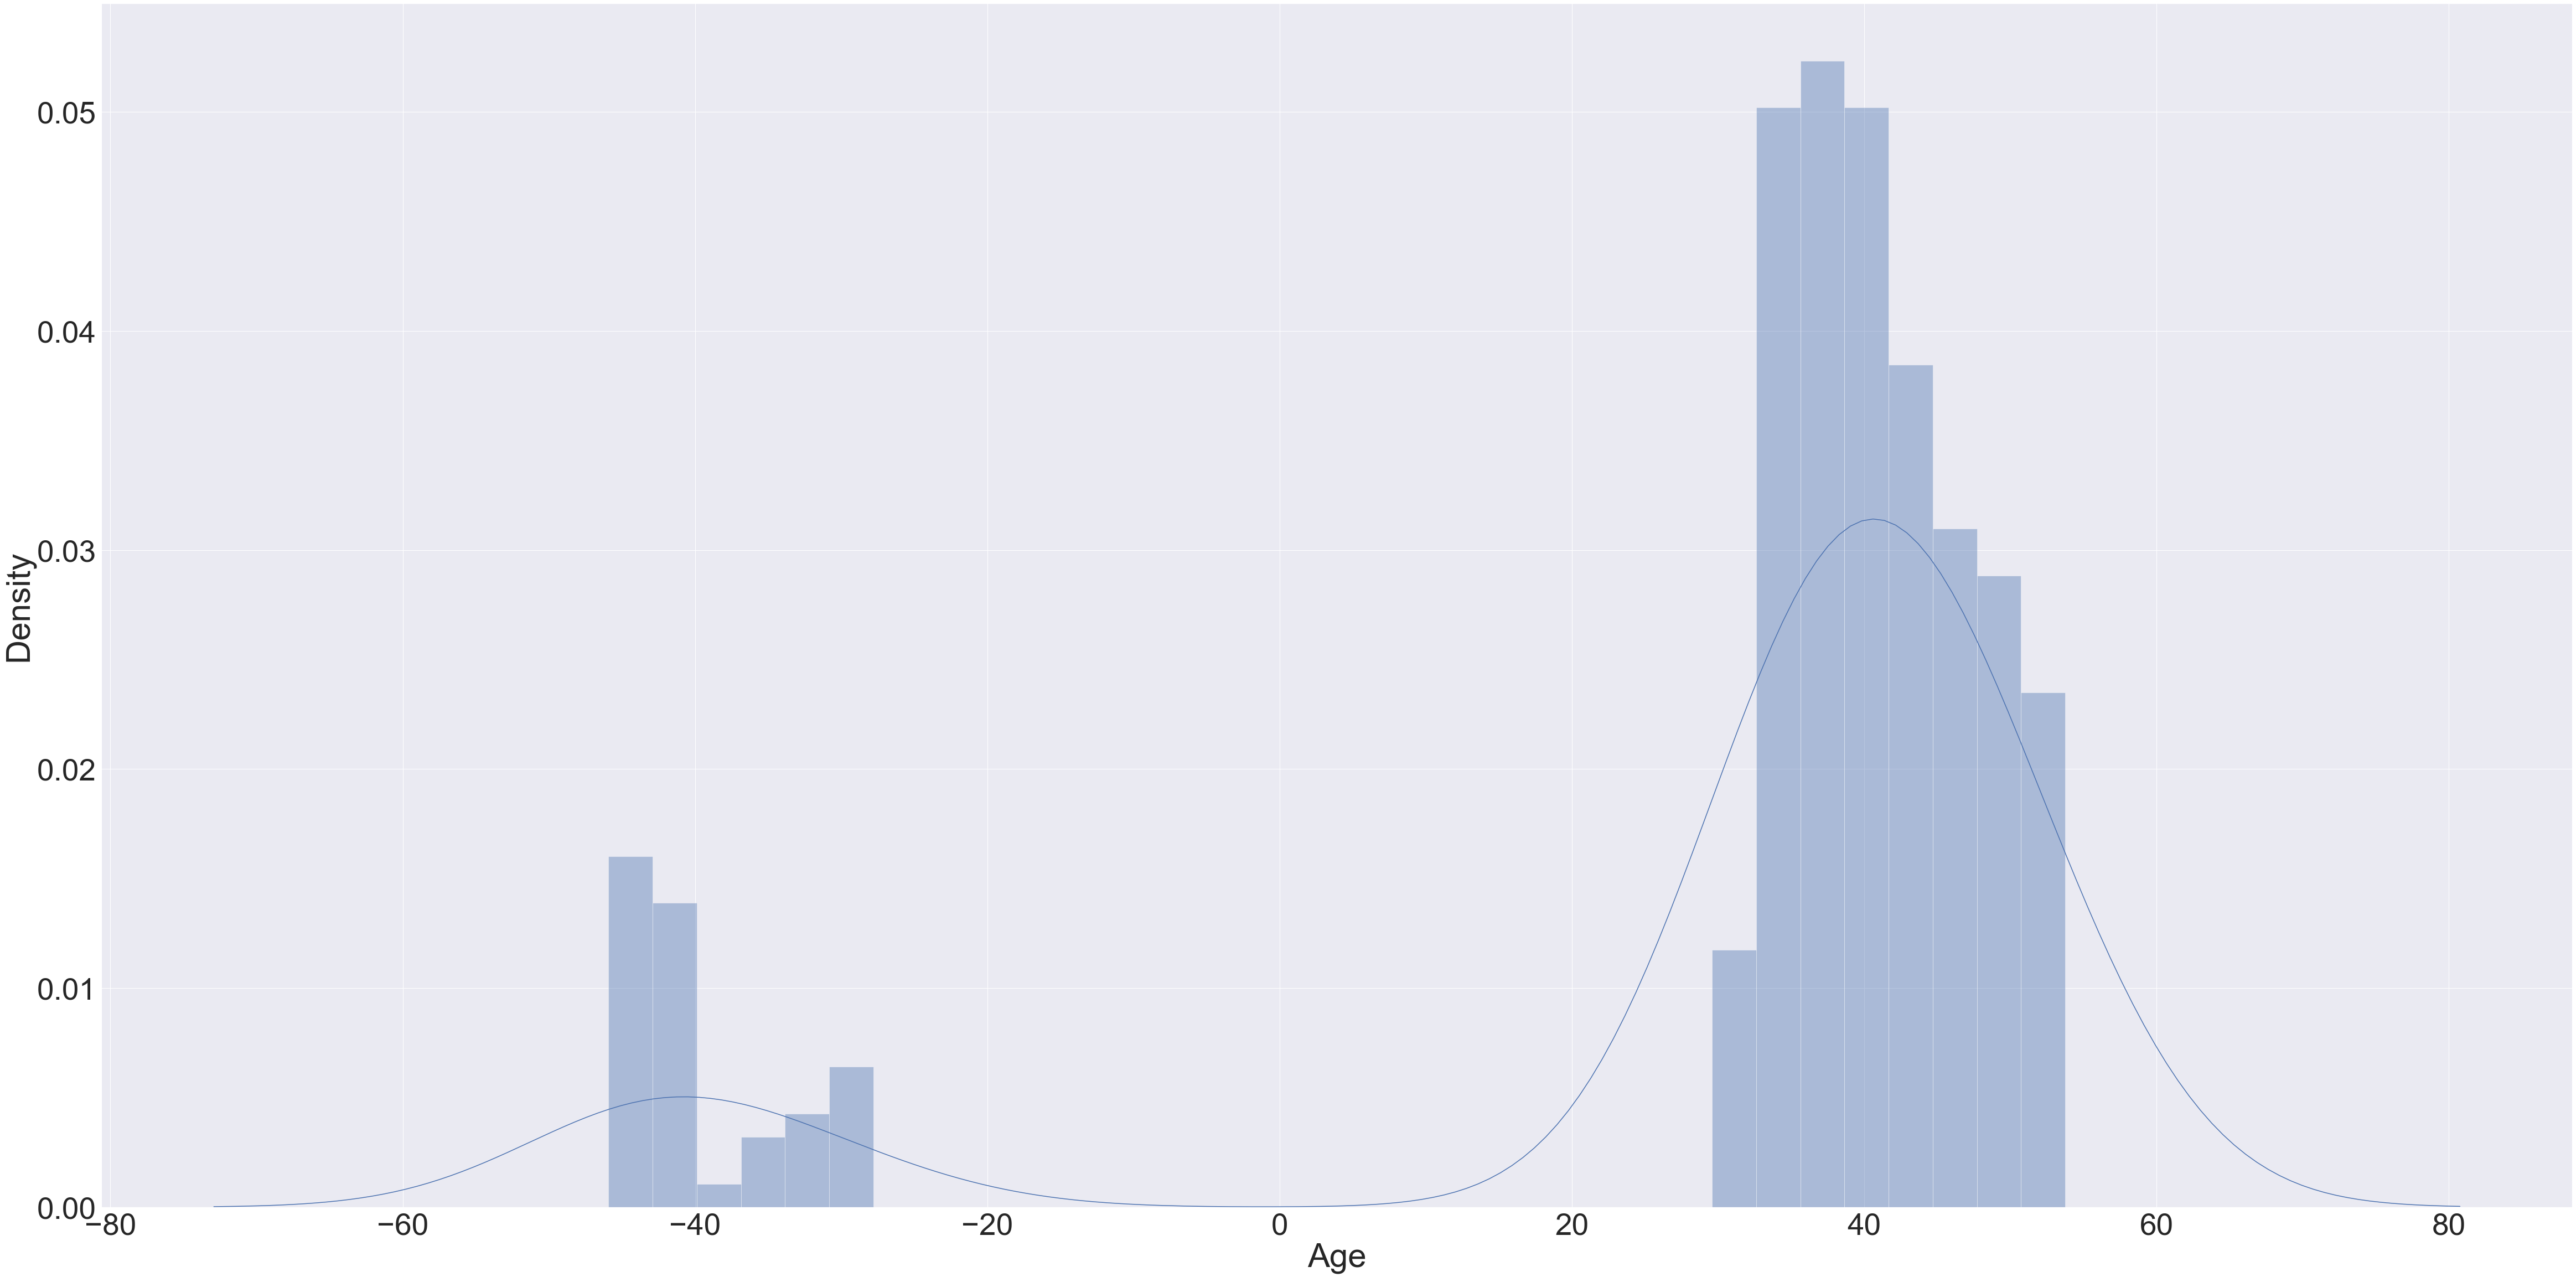

In [26]:
sns.set(font_scale=5)
sns.distplot(df['Age'])

**5** Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy? **ODP: NIE, brak korelacji między wiekiem i liczbą specjalnych projektów.**

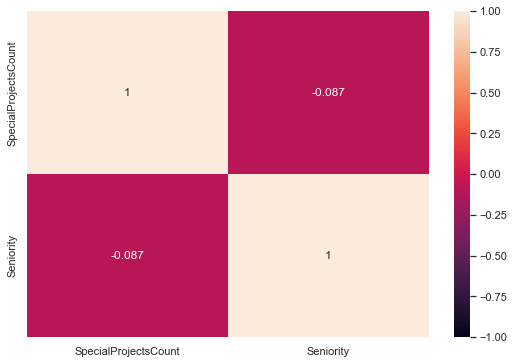

In [36]:
df_correct = df[df['Age'] > 0]

sns.set(font_scale=1)
plt.figure(figsize=(9, 6))
sns.heatmap(df_correct[['SpecialProjectsCount', 'Seniority']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

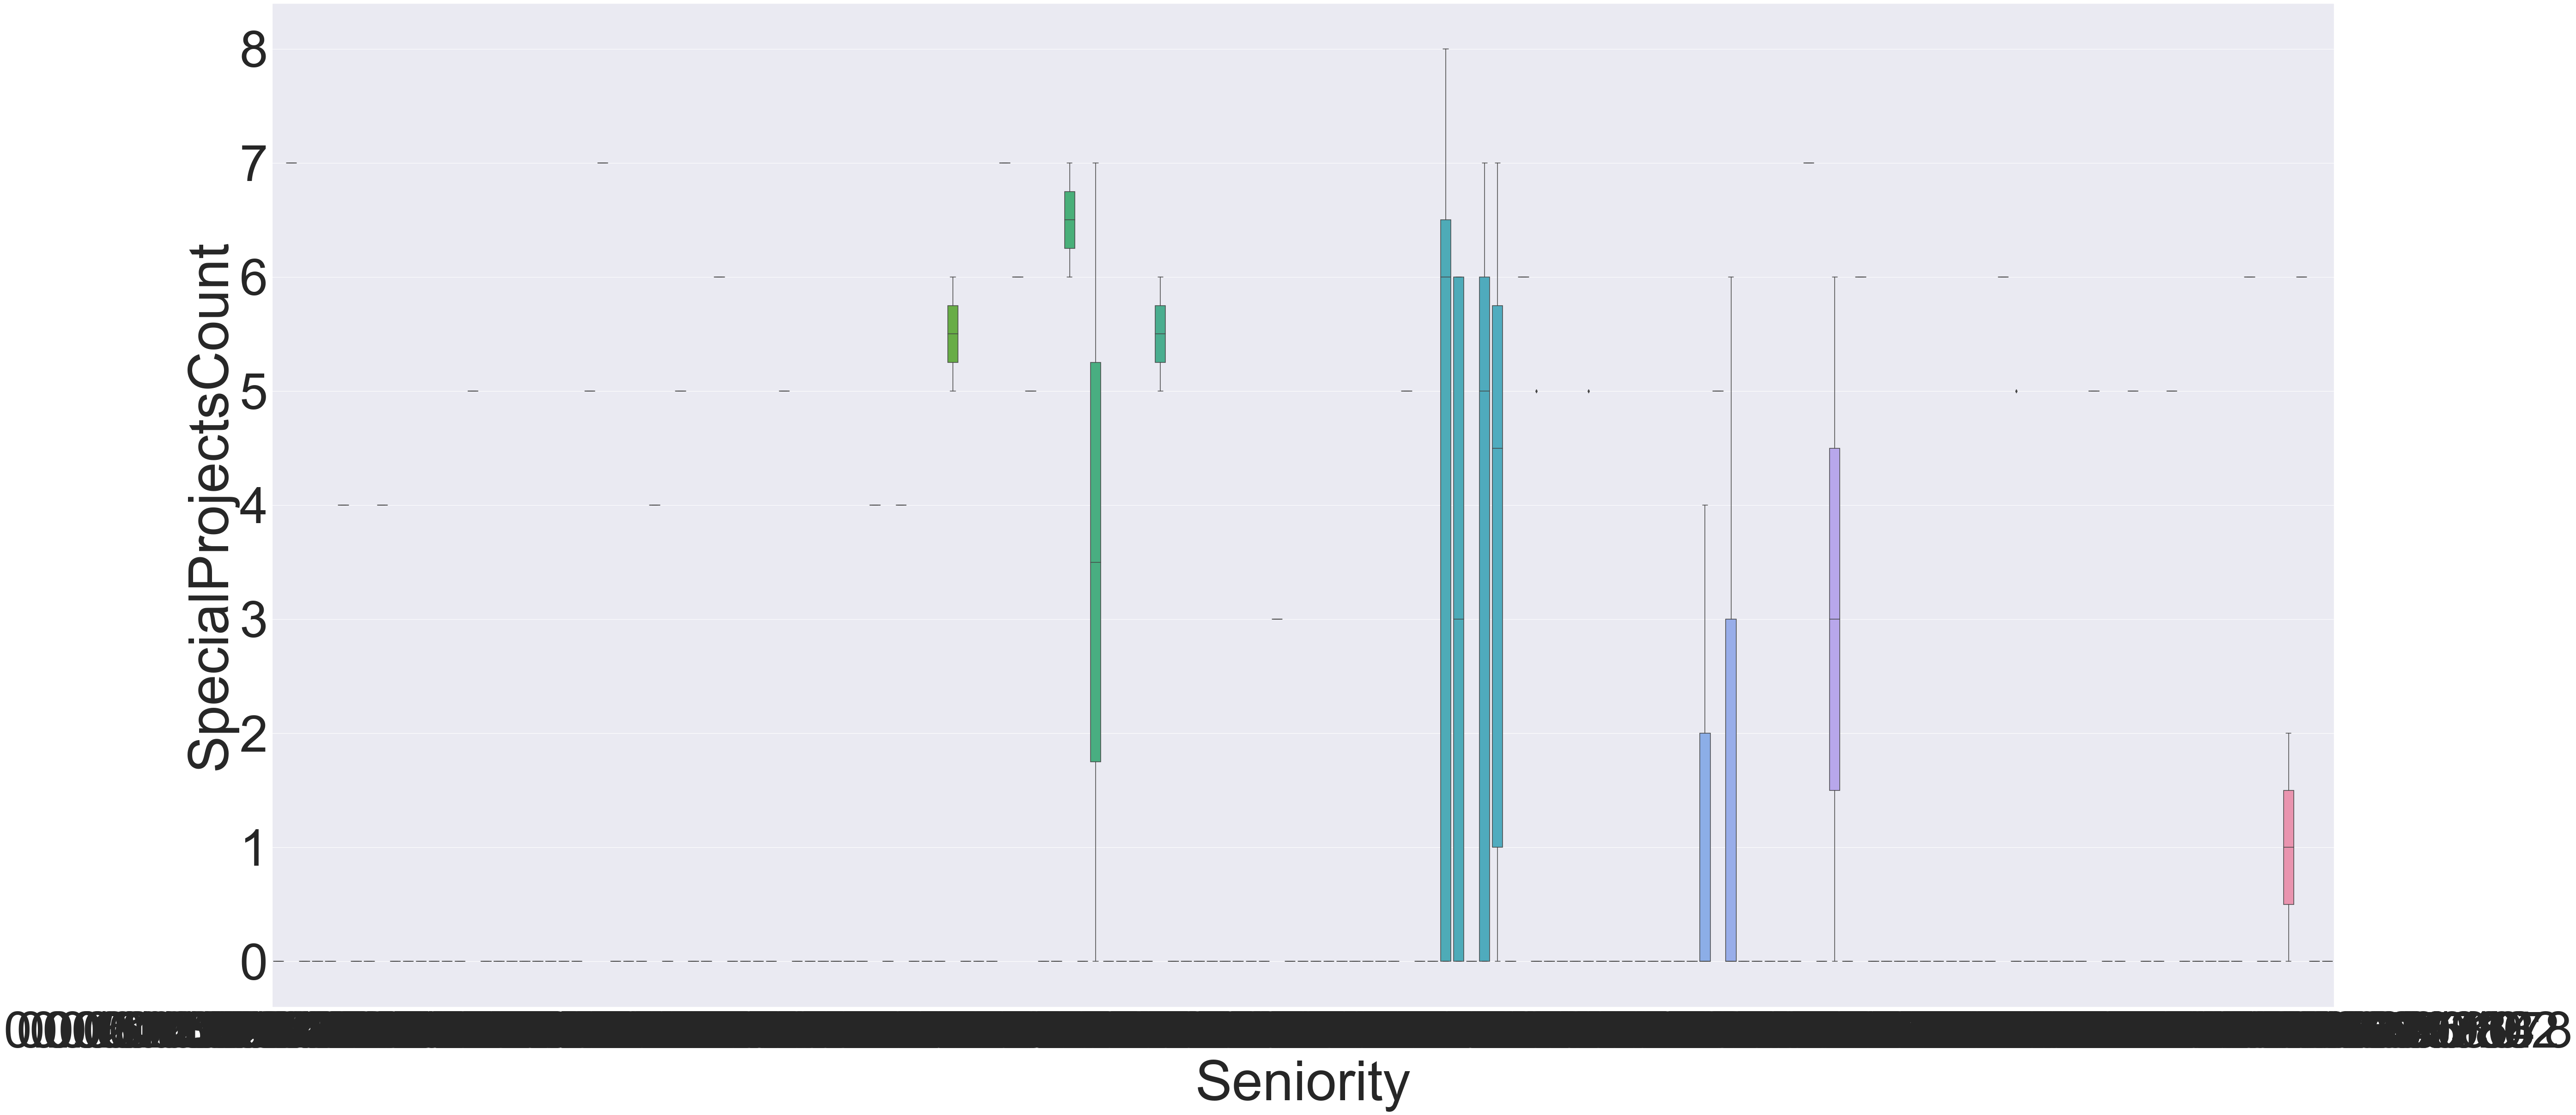

In [37]:
sns.set(font_scale=10)
g = sns.boxplot(x='Seniority',y='SpecialProjectsCount',data=df_correct)
plt.show()